In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyicf

In [3]:
icf_raw = pyicf.RawComponents()

you are using nologin method, data you access may be limited


In [4]:
# icf_raw.update_database() # uncoment if running for the first time

## Series loading

In [6]:
icf_rawdata = icf_raw.build_dataframe()  # uncoment if runing for the first time

# icf_rawdata = pd.read_csv('database/icf_raw_components.csv', index_col='datetime')
icf_rawdata

FileNotFoundError: [Errno 2] No such file or directory: 'database/series_tradignview/juros_br01y.csv'

## Imputation and graphical exploration

In [6]:
icf_rawdata.isna().sum()


juros_br01y              253
juros_br05y              251
juros_us03m              174
juros_us02y              174
juros_us10y              174
juros_uk03m              174
juros_uk02Y              174
juros_uk10Y              174
juros_de03m              174
juros_de02Y              174
juros_de10Y              174
juros_jp03m              174
juros_jp02Y              174
juros_jp10Y              174
vix                      174
dollar_index_advanced    174
dollar_index_emerging    174
brl_usd                  174
oil_wti                  174
oil_brent                174
metals                   174
foods                    174
msci_emerging            174
msci_world               228
ibov                     174
cds_brazil5y             222
dtype: int64

Imputations can be performed using Next Observation Carried Backward os Interpolation

In [7]:
## imputation with Next Observation Carried Backward

# icf_rawdata_imputed = icf_rawdata.bfill()
# icf_rawdata_imputed = icf_rawdata_nonan.dropna()

## imputation using interpolation
icf_rawdata_imputed = icf_rawdata.interpolate(method='time').dropna()
icf_rawdata_imputed

,juros_br01y,juros_br05y,juros_us03m,juros_us02y,juros_us10y,juros_uk03m,juros_uk02Y,juros_uk10Y,juros_de03m,juros_de02Y,...,dollar_index_emerging,brl_usd,oil_wti,oil_brent,metals,foods,msci_emerging,msci_world,ibov,cds_brazil5y
datetime,,,,,,,,,,,,,,,,,,,,,
2017-10-31,8.590309,8.967897,1.266200,1.766000,2.412800,0.399000,0.522000,1.329900,-0.912000,-0.684300,...,116.330300,0.305000,57.400000,62.700000,210.300000,200.500000,1122.000000,486.950000,72048.908667,169.500000
2017-11-01,8.585126,8.964380,1.270447,1.770833,2.412703,0.397033,0.519183,1.325247,-0.908367,-0.682153,...,116.353987,0.304880,57.489667,62.830000,210.333333,200.503333,1123.326667,487.671667,71970.992000,169.526667
2017-11-30,8.434836,8.862391,1.393600,1.911000,2.409900,0.340000,0.437500,1.190300,-0.803000,-0.619900,...,117.040900,0.301400,60.090000,66.600000,211.300000,200.600000,1161.800000,508.600000,76254.375133,170.300000
2017-12-01,8.429654,8.858874,1.395913,1.918000,2.419497,0.339097,0.444632,1.200232,-0.799129,-0.617026,...,116.928594,0.301784,60.240323,66.673226,211.406452,200.612903,1165.025806,510.758065,76402.078000,169.983871
2017-12-31,8.274181,8.753368,1.465300,2.128000,2.707400,0.312000,0.658600,1.498200,-0.683000,-0.530800,...,113.559400,0.313300,64.750000,68.870000,214.600000,201.000000,1261.800000,575.500000,84380.788937,160.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-02-28,12.865000,12.602000,4.773002,4.029000,3.471000,4.109000,3.417000,3.465000,2.723000,2.678000,...,126.103400,0.197100,75.645000,79.730000,313.700000,245.200000,997.200000,511.300000,101991.118929,229.150000
2023-03-01,12.868364,12.597030,4.778032,4.027909,3.469242,4.114182,3.414455,3.463182,2.746091,2.674152,...,126.103400,0.197109,75.789545,79.881515,313.700000,245.200000,997.130303,511.115152,101882.200000,229.129032
2023-03-31,12.969273,12.447939,4.928938,3.995182,3.416515,4.269636,3.338091,3.408636,3.438818,2.558697,...,126.103400,0.197382,80.125909,84.426970,313.700000,245.200000,995.039394,505.569697,100918.136364,228.500000


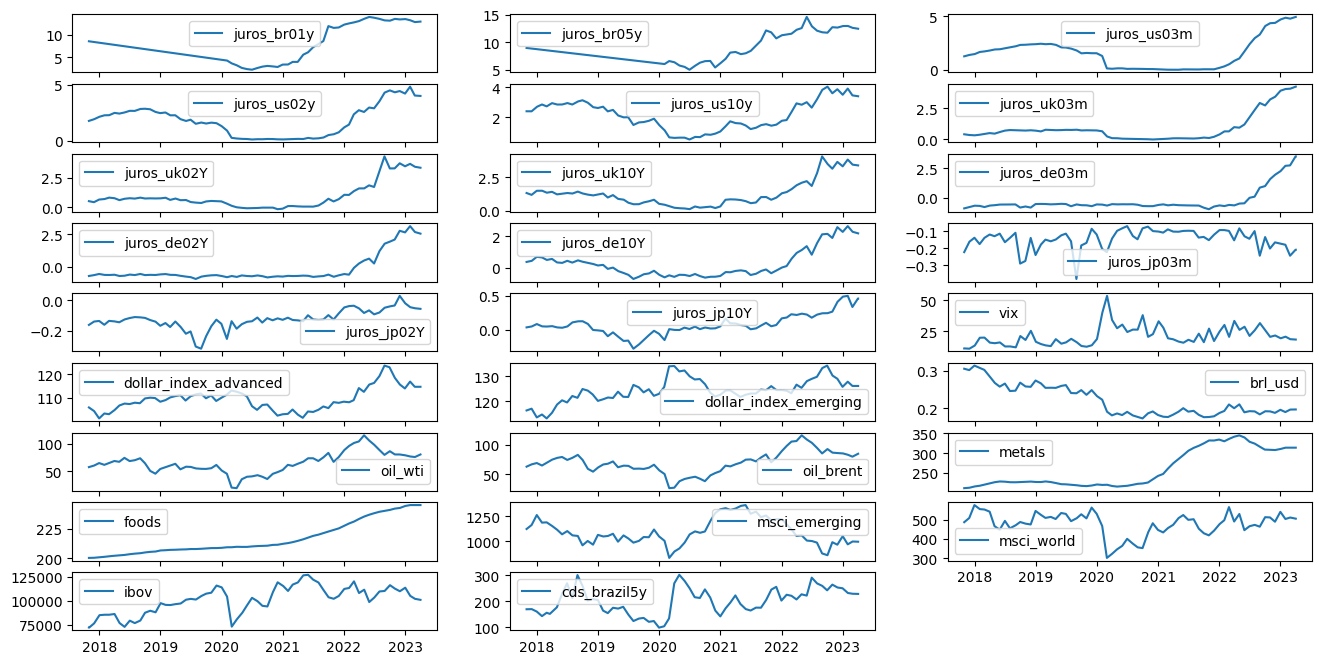

In [8]:
fig = plt.figure(1, figsize=(16, 8))

n_columns = 3
n_rows = icf_rawdata_imputed.shape[1] // n_columns

if icf_rawdata_imputed.shape[1] % n_columns:
    n_rows += 1

position = range(1, icf_rawdata_imputed.shape[1] + 1)
fig = plt.figure(1, figsize=(16, 8))

for idx, column in enumerate(icf_rawdata_imputed):
    ax = fig.add_subplot(n_rows, n_columns, position[idx])
    ax.plot(icf_rawdata_imputed.index, icf_rawdata_imputed[column], label=column)
    plt.legend()

In [9]:
from pyicf.data.constants import GROUPS
from pyicf.data.constants import WEIGHTS

## Trend removal of groups 4 through 7

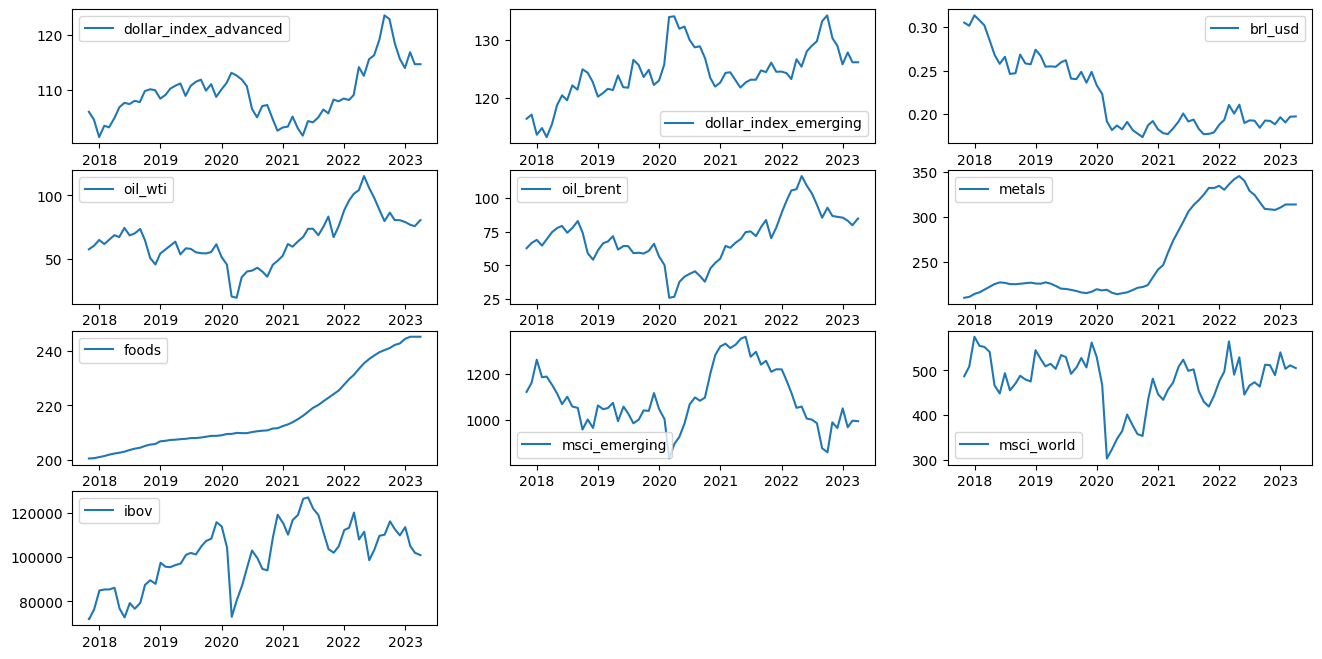

In [10]:
#  Select groups 4 through 7
selected_columns = []
for group in GROUPS:
    if group[1] >= 4:
        selected_columns.append(group[0])

# Prepare grid plot
n_columns = 3
n_rows = len(selected_columns) // n_columns
if len(selected_columns) % n_columns:
    n_rows += 1
position = range(1, len(selected_columns) + 1)
fig = plt.figure(1, figsize=(16, 8))

# plot
for idx, column in enumerate(selected_columns):
    ax = fig.add_subplot(n_rows, n_columns, position[idx])
    ax.plot(icf_rawdata_imputed.index, icf_rawdata_imputed[column], label=column)
    plt.legend()    


In [11]:
## Uncoment to see trend, seasonal and residual components

# from statsmodels.tsa.seasonal import seasonal_decompose

# for idx, column in enumerate(selected_columns):
#     df = pd.DataFrame(icf_rawdata_nonan[column], index=icf_rawdata_nonan.index)
#     decompose_result = seasonal_decompose(df, model="multiplicative", period=12)

#     trend = decompose_result.trend
#     seasonal = decompose_result.seasonal
#     residual = decompose_result.resid

#     decompose_result.plot()



### Apply log and moving window detrenders

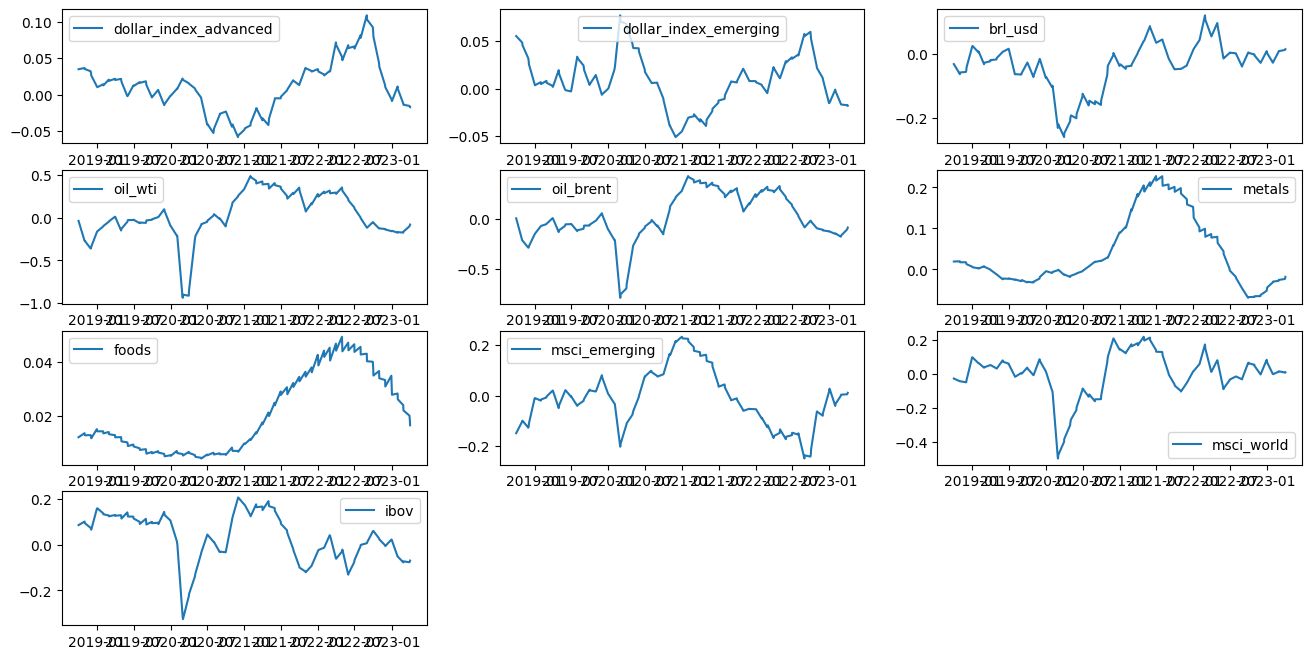

In [12]:
detrended = pd.DataFrame([])
for idx, column in enumerate(selected_columns):
    trend_removed = np.log(icf_rawdata_imputed[column])
    rolling_mean = trend_removed.rolling(window = 30).mean()
    detrended = pd.concat([detrended, trend_removed - rolling_mean],axis=1)

fig = plt.figure(1, figsize=(16, 8))

for idx, column in enumerate(selected_columns):
    ax = fig.add_subplot(n_rows, n_columns, position[idx])
    ax.plot(icf_rawdata_imputed.index, detrended[column], label=column)
    plt.legend()
# detrended

In [13]:
# Substitute result
icf_rawdata_imputed[selected_columns] = detrended[selected_columns]

# Apply imputation one more time
icf_rawdata_imputed = icf_rawdata.interpolate(method='time').dropna()
icf_rawdata_imputed.describe()

,juros_br01y,juros_br05y,juros_us03m,juros_us02y,juros_us10y,juros_uk03m,juros_uk02Y,juros_uk10Y,juros_de03m,juros_de02Y,...,dollar_index_emerging,brl_usd,oil_wti,oil_brent,metals,foods,msci_emerging,msci_world,ibov,cds_brazil5y
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,7.651376,8.710059,1.560970,1.816562,2.159910,0.879830,0.941196,1.289683,-0.287439,-0.173414,...,124.296019,0.221089,64.987467,69.850275,258.151785,216.551365,1091.346262,479.354382,100729.091558,201.609961
std,3.770102,2.457395,1.428623,1.369549,0.964514,1.136449,1.112652,1.002655,0.965180,1.063690,...,4.636852,0.039514,19.346458,19.143220,47.717382,13.923596,125.949448,59.153613,14138.265427,50.106332
min,2.250000,5.040000,0.015200,0.109000,0.533000,-0.025000,-0.155000,0.111000,-0.983000,-0.912000,...,113.152400,0.173700,19.045000,25.920000,210.300000,200.500000,833.000000,302.350000,71970.992000,98.800000
25%,4.649083,6.613356,0.105914,0.252050,1.466917,0.081450,0.142842,0.582424,-0.679000,-0.689059,...,121.823884,0.188527,53.810758,59.080156,219.353226,207.301613,1001.273438,455.477273,87988.306313,164.525806
50%,6.994125,8.007793,1.557242,1.862290,2.125539,0.644000,0.623000,1.147300,-0.601000,-0.619900,...,124.233687,0.197400,64.541613,69.330000,226.100000,210.200000,1058.512121,492.280645,102650.359333,205.100000
75%,11.963548,11.332414,2.331580,2.655697,2.901940,0.752359,0.821800,1.428646,-0.549548,-0.534700,...,126.511582,0.254702,75.763848,82.702143,310.390323,225.433871,1185.851786,513.587500,111414.234091,243.104326
max,14.018000,14.569000,4.938998,4.820000,4.052000,4.280000,4.287000,4.083000,3.485000,3.125000,...,134.219000,0.313300,115.260000,116.210000,345.200000,245.200000,1361.500000,575.500000,126801.660000,302.000000


## Standardizing and PCA extraction

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [15]:
from collections import defaultdict

In [32]:
import plotly.express as px
import plotly.graph_objects as go

In [58]:
# standardization
# scaler = StandardScaler()
scaler = MinMaxScaler()
data_standardized = pd.DataFrame(
    scaler.fit_transform(icf_rawdata_imputed),
    columns = icf_rawdata_imputed.columns
)    

# PCA extraction
pca = PCA(n_components=1)
groups = defaultdict(list)
weights = defaultdict(list)
for column, group in GROUPS:
    groups[group].append(column)

columns = [
    'juros_br',
    'juros_ex',
    'risco',
    'moedas',
    'petroleo',
    'comodities',
    'mercado',
]
components = pd.DataFrame([])
for group, column in zip(groups, columns):
    pca.fit(data_standardized[groups[group]])
    data_components = pca.transform(data_standardized[groups[group]])
    components = pd.concat(
        [
            components,
            pd.DataFrame(data_components, columns=[column,])
        ],
        axis=1
    )

# apply weights
weights = np.array([w[1] for w in WEIGHTS])
icf = components*weights[None, :]
icf = icf.T.sum()/weights.sum()

# standardization
# scaler = MinMaxScaler()
scaler = StandardScaler()
icf_standardized = scaler.fit_transform(icf.to_numpy().reshape(-1, 1))
icf_standardized = pd.DataFrame(icf_standardized, columns=('icf',), index=icf_rawdata_imputed.index)

# plots
fig = go.Figure()

components_plot = px.line(components, x=icf_standardized.index, y=components.columns)
icf_plot = px.line(
    icf_standardized,
    x=icf_standardized.index,
    y=icf_standardized.columns,
    width=6000,
)

for trace in components_plot.data:
    fig.add_trace(trace)
fig.add_trace(icf_plot.data[0])

fig.update_traces({'line': {'width':1}})
fig.update_traces({'line': {'width':3, 'color': 'black'}}, selector={'legendgroup': 'icf'})

fig.show()